# `lowest_common_ancestor` (LCA) en un BST

El ancestro común más bajo (Lowest Common Ancestor, LCA) en un árbol de búsqueda binaria (BST) se refiere al ancestro más profundo que dos nodos dados, p y q, tienen en común. Este concepto es fundamental en muchas aplicaciones, como la optimización de consultas en bases de datos jerárquicas, sistemas de control de versiones, entre otros.

En un BST, encontrar el LCA es relativamente sencillo debido a la propiedad intrínseca del árbol: para cualquier nodo n, todos los valores en el subárbol izquierdo son menores que n, y todos los valores en el subárbol derecho son mayores que n. Por lo tanto, el LCA de dos nodos p y q es el primer nodo n que cumple que p ≤ n ≤ q (asumiendo que p < q).

## Implementación en Python

La función `lowest_common_ancestor` no requiere búsqueda exhaustiva a través del árbol. En lugar de eso, puede seguir una ruta desde la raíz y decidir en cada paso si continúa hacia la izquierda o hacia la derecha, basándose en la comparación de los valores de los nodos.

Aquí te muestro cómo implementar este método en la clase [`BST`](src/BST.py): 

In [6]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/BinaryTree.py
from src.BST import BST

In [7]:

def lowest_common_ancestor(self, p, q):
    # Inicializa node como la raíz del árbol.
    node = self.root
    while node:
        # Si ambos p y q son menores que node, LCA está en el subárbol
        # izquierdo.
        if p < node.data and q < node.data:
            node = node.left
        # Si ambos p y q son mayores que node, LCA está en el subárbol derecho.
        elif p > node.data and q > node.data:
            node = node.right
        else:
            # En este punto, hemos encontrado el ancestro común más bajo (LCA),
            # donde uno de los nodos es p y el otro es q o viceversa.
            return node.data
    # Si no encontramos un LCA, retornamos None.
    return None

# Extender la clase BST con el nuevo método
BST.lowest_common_ancestor = lowest_common_ancestor

## Pruebas `lowest_common_ancestor`

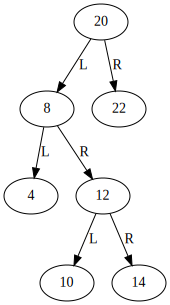

El LCA de 10 y 14 es: 12
El LCA de 4 y 14 es: 8


In [8]:
# Crear un BST y añadir elementos
bst = BST()
for key in [20, 8, 22, 4, 12, 10, 14]:
    bst.insert(key)

# Visualizar el árbol
dot = visualize_bt(bst)
display(dot)

# Probar lowest_common_ancestor
print("El LCA de 10 y 14 es:", bst.lowest_common_ancestor(10, 14))
print("El LCA de 4 y 14 es:", bst.lowest_common_ancestor(4, 14))

## Complejidad del Algoritmo

La complejidad temporal de `lowest_common_ancestor` en un BST es O(h), donde h es la altura del árbol. Esto se debe a que la función desciende a lo sumo una vez desde la raíz hasta la hoja, realizando en cada nivel una comparación simple. En un árbol equilibrado, h es log(n), por lo que la complejidad es O(log n).

La complejidad espacial es O(1), ya que no se utiliza memoria adicional proporcional al tamaño del árbol; solo se requieren unas pocas variables para realizar las comparaciones y el seguimiento del nodo actual.

## Ejercicios Prácticos

1. Implementa una función para encontrar el LCA en un árbol binario no necesariamente ordenado, sin utilizar estructuras de datos adicionales para almacenar caminos.
2. Modifica la función `lowest_common_ancestor` para que pueda manejar casos en los que uno o ambos nodos no estén presentes en el BST, retornando `None` si alguno de los nodos no existe.

## Soluciones a los Ejercicios


### Ejercicio 1: Encontrar el LCA en un Árbol Binario

Para encontrar el ancestro común más bajo (LCA) en un árbol binario no necesariamente ordenado sin usar estructuras de datos adicionales, podemos utilizar una búsqueda de profundidad (DFS) que explore el árbol y utilice la recursividad para identificar el LCA. La idea clave es que si desde un nodo actual encontramos uno de los dos nodos objetivo en diferentes ramas (izquierda y derecha), este nodo actual es el LCA. Si ambos objetivos están en la misma rama, seguimos la búsqueda por esa rama.

In [9]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

def findLCA(root, n1, n2):
    if root is None:
        return None

    # Si alguno de los nodos coincide con la raíz, la raíz es el LCA.
    if root.val == n1 or root.val == n2:
        return root

    # Buscar en las ramas izquierda y derecha.
    left_lca = findLCA(root.left, n1, n2)
    right_lca = findLCA(root.right, n1, n2)

    # Si ambos llamados regresan nodos no nulos, significa que cada nodo
    # se encuentra en una rama diferente, por lo que el nodo actual es el LCA.
    if left_lca and right_lca:
        return root

    # Si solo uno de los llamados regresa un nodo no nulo, significa que ambos
    # nodos están en la misma rama o solo uno está en el árbol.
    return left_lca if left_lca else right_lca

### Ejercicio 2: `lowest_common_ancestor` con Manejo de Nodos No Presentes

Para modificar `lowest_common_ancestor` (LCA) para manejar casos en los que uno o ambos nodos no estén presentes en el BST, necesitamos primero verificar la existencia de ambos nodos antes de proceder a encontrar el LCA. Si alguno de los nodos no está presente, retornamos `None`.

In [10]:
# Verifica si el nodo con el valor dado existe en el árbol
def nodeExists(root, val):
    # Si no hay nodo, entonces el nodo no existe
    if root is None:
        return False
    # Si el valor del nodo actual es igual al buscado, retorna verdadero
    if root.val == val:
        return True
    # Continua la búsqueda en los hijos izquierdo y derecho
    return nodeExists(root.left, val) or nodeExists(root.right, val)

# Encuentra el ancestro común más bajo de dos nodos en un árbol binario
def lowest_common_ancestor(root, p, q):
    # Verificar primero si ambos nodos están presentes en el árbol.
    if not nodeExists(root, p.val) or not nodeExists(root, q.val):
        return None

    # Función interna para encontrar el LCA
    def findLCA(node):
        # Si llegamos a un nodo nulo, retornamos nulo
        if node is None:
            return None

        # Si encontramos alguno de los nodos, retornamos ese nodo
        if node.val == p.val or node.val == q.val:
            return node

        # Buscar LCA en subárboles izquierdo y derecho
        left = findLCA(node.left)
        right = findLCA(node.right)

        # Si ambos lados tienen un LCA, entonces el nodo actual es el LCA
        if left and right:
            return node

        # De lo contrario, devolvemos el que no sea nulo (si ambos son nulos, esto también devuelve nulo)
        return left if left else right

    # Comienza la busqueda desde la raíz
    return findLCA(root)


Aquí, `nodeExists` es una función auxiliar que verifica si un nodo está presente en el árbol. Solo procedemos a buscar el LCA si ambos nodos `p` y `q` existen en el árbol. Esta solución asegura que no intentemos encontrar un LCA para nodos que no forman parte del árbol, manteniendo la integridad de la operación de búsqueda del ancestro común más bajo.